In [196]:
#### OSCILADOR ARMÓNICO AMORTIGUADO FORZADO ####

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from math import *

# Condiciones iniciales

x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales

w_0 = 0.5 # Frecuencia natural x>0
W_0 = 100 # Frecuencia natural x<0
amort = 0.125 # constante de amortiguamiento
f_0 = 0.25 # Amplitud de la fuerza por unidad de masa
w = 1.4 # Frecuencia fuerza externa


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

In [198]:
def f(tf,dt,x_0,v_0):

    n = int(tf/dt)+1
    t,x,v = np.zeros(n),np.zeros(n),np.zeros(n)
    x[0],v[0] = x_0,v_0
    xt,vt = x[0],v[0]

    for i in range(n-1):

        A = f_0/np.sqrt(((W(xt)**2-w**2)**2+(2*amort*w)**2))
        if W(xt) != w:
            d = np.arctan(2*amort*w/(W(xt)**2-w**2))-w*i*dt
        else:
            d = pi/2-w*i*dt

        r = np.sqrt(W(xt)**2-amort**2)
        c1 = xt-A*np.cos(d)
        c2 = (vt+amort*c1-w*A*np.sin(d))/r

        x[i+1] = np.exp(-amort*dt)*(c1*np.cos(dt*r)+c2*np.sin(dt*r))+A*np.cos(w*dt-d)
        v[i+1] = np.exp(-amort*dt)*(np.cos(dt*r)*(-amort*c1+r*c2)+np.sin(dt*r)*(-r*c1-amort*c2))-w*A*np.sin(w*dt-d)
        t[i+1] = t[i]+dt
        xt,vt = x[i+1],v[i+1]

    return [x,v,t]

h = 0.0001 # Paso de tiempo
tf = 20 # Variables independientes escogidas
T = 2*pi/w
n = int(tf/T) # Número de puntos del diagrama de Poincaré

sol = f(tf,h,x_0,v_0)
x = sol[0]
v = sol[1]
t = sol[2]

ind = np.array([np.searchsorted(t,T*(i+1)+0.9) for i in range(n-1)]) # Calculamos los puntos del diagrama de Poincaré
xp = x[ind]
vp = v[ind]


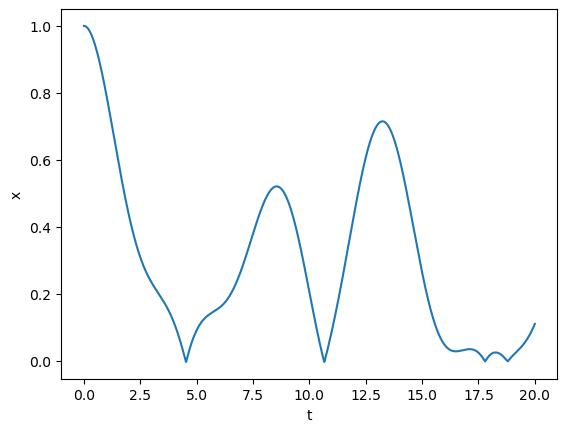

In [201]:
# Representaciones gráficas

#plt.plot(x,v)
#plt.plot(xp,vp,'.',color='red',markersize='5',alpha=0.7)
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('')
plt.show()